In [1]:
import pandas as pd
df = pd.read_csv('st.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch   
0    female        group B           bachelor's degree      standard  \
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

<AxesSubplot:>

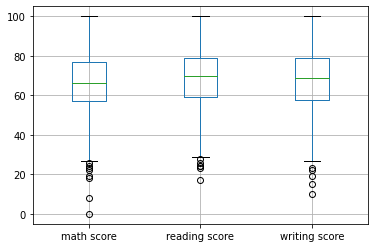

In [5]:
col = ['math score', 'reading score', 'writing score']
df.boxplot(col)

In [6]:
import numpy as np
print(np.where(df['math score']>90))
print(np.where(df['reading score']<25)) 
print(np.where(df['writing score']< 30))                 

(array([ 34, 104, 114, 121, 149, 165, 171, 179, 233, 263, 286, 306, 451,
       458, 469, 501, 503, 521, 539, 546, 562, 566, 571, 594, 612, 618,
       623, 625, 685, 689, 710, 712, 717, 719, 736, 779, 784, 815, 846,
       855, 864, 886, 903, 916, 919, 934, 950, 957, 962, 979], dtype=int64),)
(array([ 59, 327, 596, 980], dtype=int64),)
(array([ 17,  59,  76, 211, 327, 338, 596, 896, 980], dtype=int64),)


In [7]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(df['math score']))
print(z)

[0.39002351 0.19207553 1.57771141 1.25954302 0.65395415 0.32404085
 1.44574609 1.72142165 0.13783778 1.85338697 0.53373375 1.72142165
 0.07185512 0.78591948 1.06159503 0.19207553 1.44574609 3.17304019
 1.32552568 0.79766439 0.00587246 0.07185512 1.457491   0.19207553
 0.52198883 0.45600617 0.19207553 0.0601102  0.25805819 0.2698031
 0.19207553 0.20382044 0.66569907 1.72142165 2.03959004 0.98386746
 0.52198883 1.06159503 0.58797149 0.59971641 0.73168173 0.53373375
 0.86364705 0.46775108 1.06159503 0.07185512 0.73168173 0.00587246
 0.59971641 1.04985012 0.86364705 0.71993682 0.86364705 1.44574609
 0.32404085 2.18330027 1.04985012 0.92962971 0.53373375 4.36072809
 0.85190214 1.78740431 0.2698031  0.19207553 0.46775108 0.0601102
 1.39150834 0.40176842 0.33578576 1.78740431 0.53373375 0.20382044
 1.65543898 0.33578576 1.1275777  1.457491   2.38124826 0.9178848
 0.33578576 0.2698031  1.25954302 1.1275777  1.06159503 0.39002351
 1.58945632 0.45600617 0.65395415 0.32404085 0.53373375 0.4560061

In [8]:
threshold = 0.01
sample_outliers = np.where(z <threshold)
sample_outliers

(array([ 20,  47, 107, 156, 159, 190, 218, 311, 351, 379, 498, 517, 518,
        535, 632, 670, 692, 699, 707, 774, 776, 792, 839, 966], dtype=int64),)

In [9]:
new_df=df
for i in sample_outliers:
    new_df.drop(i,inplace=True)
new_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
df['math score'] = df['math score'].astype(float).astype("float32")
df['reading score'] = df['reading score'].astype(float).astype("float32")
df['writing score'] = df['writing score'].astype(float).astype("float32")
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float32
reading score                  float32
writing score                  float32
dtype: object

In [11]:
df.shape
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [17]:
lst = []
for i in range(df.shape[0]):
    # if (df['test preparation course'][i] == 'none'):
    if (df['gender'][i] == 'male'):
        lst.append(i)
print("Student with missing preparation course are at indices : ")
for i in range(len(lst)):
    print(lst[i])
print()

KeyError: 20

In [ ]:

for i in range(df.shape[0]):
    df['math score'][i] = df['math score'][i]/10
    df['reading score'][i] = df['reading score'][i]/10
    df['writing score'][i] = df['writing score'][i]/10
df

/tmp/ipykernel_31855/3841853245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][i] = df['math score'][i]/10
/tmp/ipykernel_31855/3841853245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading score'][i] = df['reading score'][i]/10
/tmp/ipykernel_31855/3841853245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'][i] = df['writing score'][i]/10


KeyError: 20

: 